In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col= 0)

## Filtering the data 

In [3]:
df['avgscore'].describe()

count    41365.000000
mean       465.338100
std        111.880952
min         84.541739
25%        394.414970
50%        482.298914
75%        550.326946
max        757.011431
Name: avgscore, dtype: float64

So our max is 757.011431 and our min is 84.541739. I'm wondering if some of these are anomalies and we therefore want to delete rows with values under and over a certain amount.

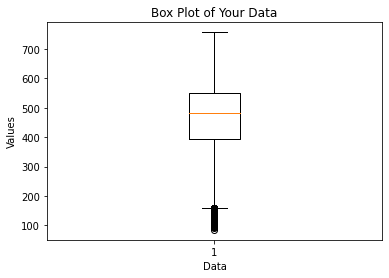

In [4]:
# Create a box plot
plt.boxplot(df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

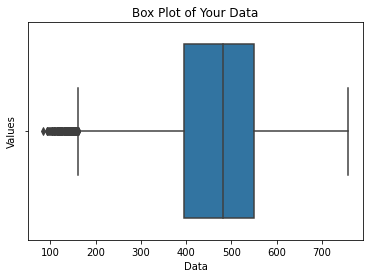

In [5]:
# Create a box plot
sns.boxplot(x=df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

Interpretation
Central Box: Represents the interquartile range (IQR), containing the middle 50% of the data.
Line inside the Box: Indicates the median of the data.
Whiskers: Extend to the smallest and largest values within 1.5 * IQR from the lower and upper quartiles.
Dots outside the Whiskers: Represent potential outliers.


In [6]:
# Method 1: Z-score method
from scipy.stats import zscore

# Calculate the Z-scores
df['zscore'] = zscore(df['avgscore'])

# Define a threshold (e.g., 3)
threshold = 3

# Filter the data to remove outliers
df_zscore_filtered = df[(df['zscore'] < threshold) & (df['zscore'] > -threshold)]

In [7]:
df.shape

(41365, 65)

In [8]:
df_zscore_filtered.shape

(41318, 65)

In [9]:
# Method 2: IQR method
Q1 = df['avgscore'].quantile(0.25)
Q3 = df['avgscore'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_iqr_filtered = df[(df['avgscore'] >= lower_bound) & (df['avgscore'] <= upper_bound)]

In [10]:
df_iqr_filtered.shape

(41158, 65)

In [11]:
summary_original = df['avgscore'].describe()
summary_zscore_filtered = df_zscore_filtered['avgscore'].describe()
summary_iqr_filtered = df_iqr_filtered['avgscore'].describe()

In [12]:
print("Original Data Summary:")
print(summary_original)
print("\nZ-score Filtered Data Summary:")
print(summary_zscore_filtered)
print("\nIQR Filtered Data Summary:")
print(summary_iqr_filtered)

Original Data Summary:
count    41365.000000
mean       465.338100
std        111.880952
min         84.541739
25%        394.414970
50%        482.298914
75%        550.326946
max        757.011431
Name: avgscore, dtype: float64

Z-score Filtered Data Summary:
count    41318.000000
mean       465.738188
std        111.312929
min        130.611489
25%        394.757593
50%        482.429018
75%        550.398401
max        757.011431
Name: avgscore, dtype: float64

IQR Filtered Data Summary:
count    41158.000000
mean       466.971053
std        109.754016
min        160.574553
25%        395.985095
50%        483.052609
75%        550.627011
max        757.011431
Name: avgscore, dtype: float64


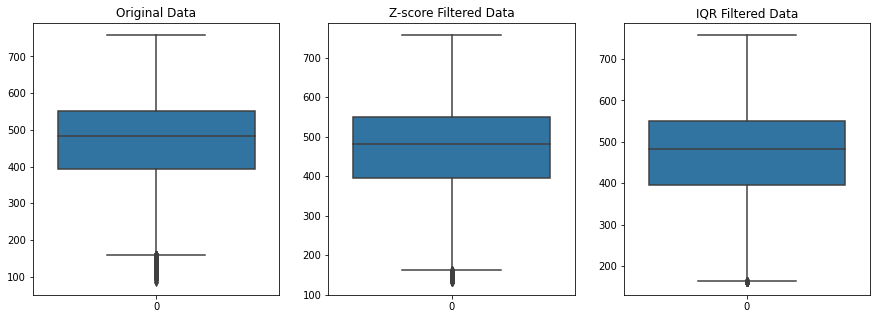

In [13]:
# Visualize distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['avgscore'])
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.boxplot(df_zscore_filtered['avgscore'])
plt.title('Z-score Filtered Data')

plt.subplot(1, 3, 3)
sns.boxplot(df_iqr_filtered['avgscore'])
plt.title('IQR Filtered Data')

plt.show()

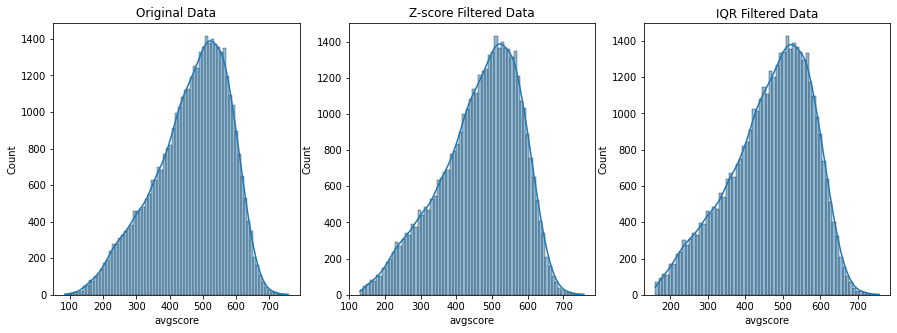

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['avgscore'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(df_zscore_filtered['avgscore'], kde=True)
plt.title('Z-score Filtered Data')

plt.subplot(1, 3, 3)
sns.histplot(df_iqr_filtered['avgscore'], kde=True)
plt.title('IQR Filtered Data')

plt.show()

Analysis and Comparison
Summary Statistics: Compare the mean, median, standard deviation, and other statistics to see how each method affects the central tendency and spread of the data.
Visual Inspection: Use box plots to visually inspect the data distribution and outliers in each dataset. Use histograms to compare the frequency distributions.
Impact on Analysis: Perform key analyses (e.g., regression, clustering) on both filtered datasets and compare the results to understand the impact of outlier removal.
Documenting Findings
Descriptive Statistics: Summarize how the descriptive statistics differ across the datasets.
Visual Differences: Highlight any noticeable differences in the box plots and histograms.
Analytical Impact: Discuss how outlier removal affects your main analysis, noting any significant changes in results or interpretations.
By comparing the filtered datasets, you can determine which method of outlier removal is more appropriate for your data and analysis goals, providing a deeper understanding of the impact of outliers on your analysis.

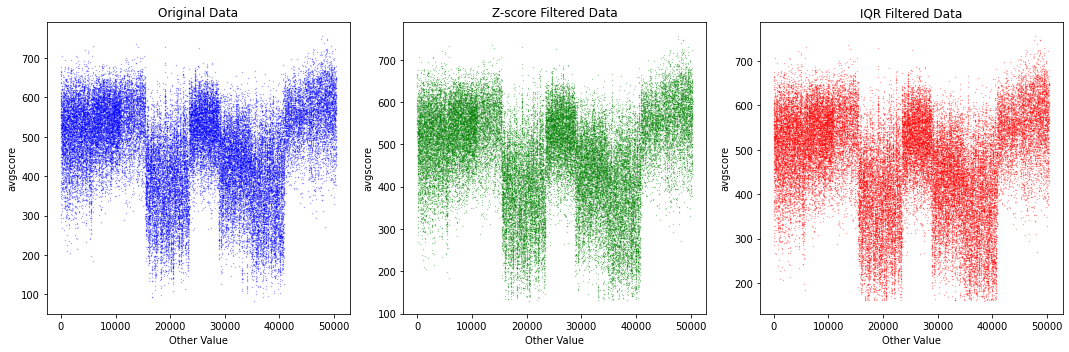

In [15]:
# Scatter plot comparisons
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df.index, df['avgscore'],color='blue', alpha=0.5, s=0.1)
plt.title('Original Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

plt.subplot(1, 3, 2)
plt.scatter(df_zscore_filtered.index, df_zscore_filtered['avgscore'], color='green', alpha=0.5, s=0.1)
plt.title('Z-score Filtered Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

plt.subplot(1, 3, 3)
plt.scatter(df_iqr_filtered.index, df_iqr_filtered['avgscore'], color='red', alpha=0.5, s=0.1)
plt.title('IQR Filtered Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

plt.tight_layout()
plt.show()


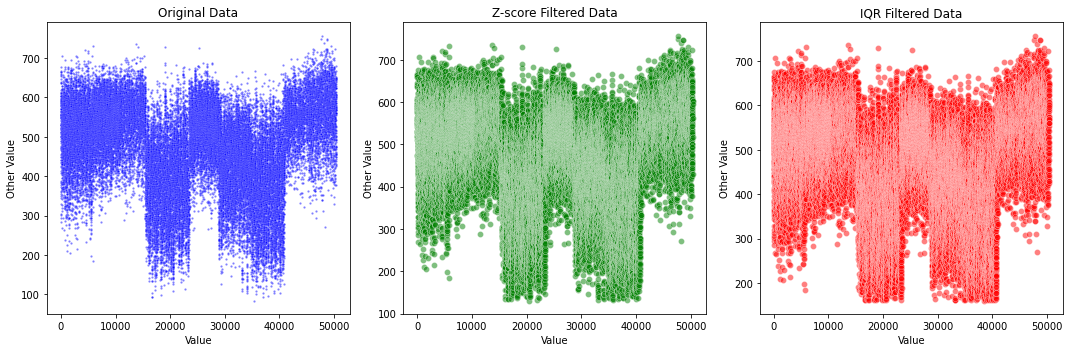

In [16]:
# Scatter plot comparisons
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df.index, y=df['avgscore'], color='blue', alpha=0.5, s=5)
plt.title('Original Data')
plt.xlabel('Value')
plt.ylabel('Other Value')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_zscore_filtered.index, y=df_zscore_filtered['avgscore'], color='green', alpha=0.5)
plt.title('Z-score Filtered Data')
plt.xlabel('Value')
plt.ylabel('Other Value')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_iqr_filtered.index, y=df_iqr_filtered['avgscore'], color='red', alpha=0.5)
plt.title('IQR Filtered Data')
plt.xlabel('Value')
plt.ylabel('Other Value')

plt.tight_layout()
plt.show()


## Let's do a zoomed in scatter for the 700+ scores and the 100- scores

In [17]:
df_200 = df[df['avgscore']<200]

Text(0.5, 0, 'Other Value')

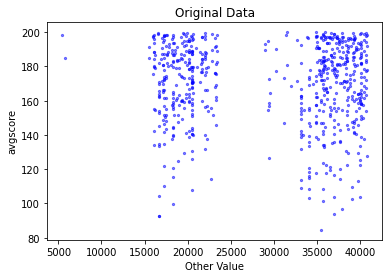

In [18]:
plt.scatter(df_200.index, df_200['avgscore'],color='blue', alpha=0.5, s=5)
plt.title('Original Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

In [19]:
df_zscore_filtered = df_zscore_filtered[df_zscore_filtered['avgscore']<200]

Text(0.5, 0, 'Other Value')

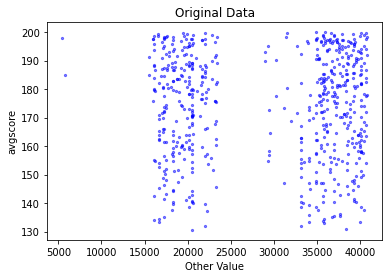

In [20]:
plt.scatter(df_zscore_filtered.index, df_zscore_filtered['avgscore'],color='blue', alpha=0.5, s=5)
plt.title('Original Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

We can plot the above on the same grid for analysis.

I think my data is normally distributed because there is an obvious dip for specific countries but there are no crazy dips or heights that are not normal for the country. 

## Hexbin and lagplot below

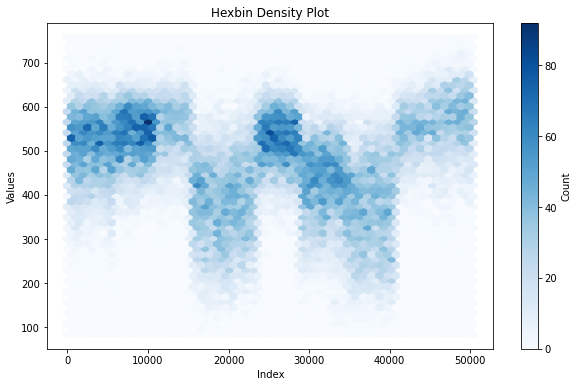

In [21]:
plt.figure(figsize=(10, 6))
plt.hexbin(df.index, df['avgscore'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Density Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

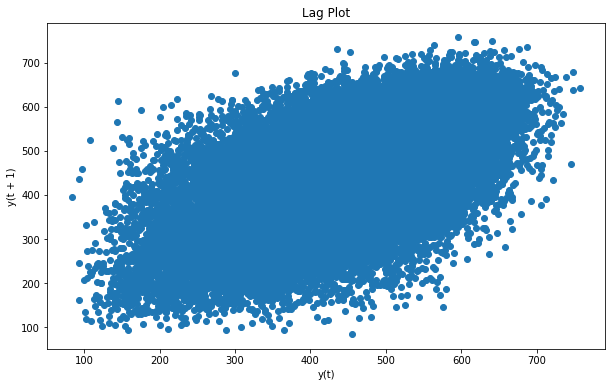

In [22]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df['avgscore'])
plt.title('Lag Plot')
plt.show()